# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [206]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
# import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [207]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

## Parte 1

### _Setup_ da parte 1

In [115]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e603b0780>,
      dtype=object)

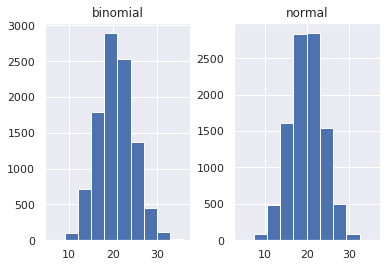

In [116]:
# temos uma amostragem normal e outra binomial
# a amostragem binomial serve para trabalharmos com problemas em um espaço de busca discreto
# por exemplo, o experimento deve repetível com as mesma probabilidade e resultado esperado 
# deve ser verdadeiro ou false apenas, estas são as pricipais características, por exemplo para prever
# a probabilidade de aparecer cara jogando uma moeda repetidas vezes para cima 
# a distribuição normal ou gaussiana contém a mesma distribuição da binomial mas com característica para
# se trabalhar com problemas que tenham um espaço contínuo, por exemplo, quando queremos saber a probabilidade de
# um numero aparecer em um determinado intevalo (area do intervalo na curva).
# podemos ver as probabilidades similares através do histograma
dataframe.hist()

In [117]:
# Para a questão 1, podemos utilizar a função describe do pandas para pegar os quantis ('25%', '50%', '75%')
# assim fica fácil de calcular a diferença, através dela podemos perceber com maior clareza a similaridade da
# distribuição
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [229]:
def q1():
    df = dataframe.describe().transpose()[['25%', '50%', '75%']].copy()
    df.columns = ['q1', 'q2', 'q3']
    return (
        (df['q1'][0] - df['q1'][1]).round(decimals=3), 
        (df['q2'][0] - df['q2'][1]).round(decimals=3), 
        (df['q3'][0] - df['q3'][1]).round(decimals=3)
    )

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

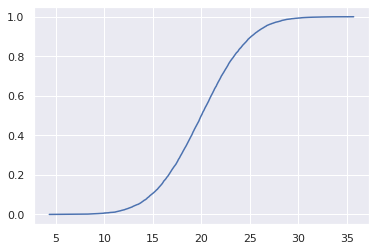

In [120]:
# para a questão dois devemos calcular a ECDF, ou seja, a função de distribuição acumulada empírica. 
# Para isto, primeiro vamos plotar a ECDF dos dados da variável normal
ecdf = ECDF(dataframe['normal'])
# plt.plot(ecdf.x, ecdf.y)

In [155]:
# Neste gráfico podemos ver no eixo X os valores da distribuição em si, e no eixo y
# as probabilidades dos valores ocorrerem
# podemos tambem descrever este valores através de uma tabela
ecdf_df = pd.DataFrame({'values': ecdf.x, 'prob': ecdf.y})

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada p
ela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [232]:
def q2():
    ecdf = ECDF(dataframe['normal'])
    ecdf_df = pd.DataFrame({'values': ecdf.x, 'prob': ecdf.y})
    mean = dataframe['normal'].mean()
    std = dataframe['normal'].std()
    return float((
        ecdf_df[(ecdf_df['values'] >= (mean-std)) & (ecdf_df['values'] <= (mean+std))]['prob'].count()/ecdf_df['prob'].count()
    ).round(decimals=3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [124]:
# A questão 3 me parece interessante comparar estes valores. Só para recapitular, vamos entender as diferenças 
# entre desvio padrão e variância primeiro:
# 
# A variância descreve o quão dispersas estão as amostras em relação a sua média aritmética,
# enquanto o desvio padrão mede a dispersão dentro de um conjunto de dados.
# A variância indica até que ponto as observações estão espalhadas, enquanto 
# o desvio padrão indica quanta observação do conjunto de dados difere da sua média

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [125]:
def q3():
    return (
        (dataframe.mean()['binomial'] - dataframe.mean()['normal']).round(decimals=3), 
        (dataframe.var()['binomial'] - dataframe.var()['normal']).round(decimals=3)
    )

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [169]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [208]:
# Nesta iremos estudar o dataset do pulsar stars
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


(array([ 275.,  360.,  348.,  611., 2505., 5875., 6014., 1712.,  170.,
          27.]), array([  5.8125    ,  24.49296875,  43.1734375 ,  61.85390625,
         80.534375  ,  99.21484375, 117.8953125 , 136.57578125,
        155.25625   , 173.93671875, 192.6171875 ]), <a list of 10 Patch objects>)

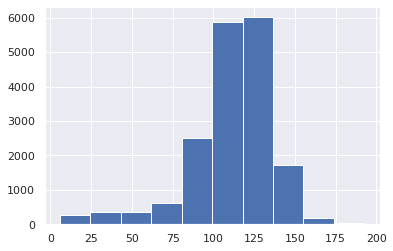

In [211]:
# vamos analisar primeiramente a variável `mean_profile`
# plt.hist(stars['mean_profile'])

In [ ]:
# vamos considerar este dataset contendo uma distribuição normal, contudo um estudo mais aprofundado
# pode identificar alguma propriedade da distribuição deste dataset, como um grau de distorção negativo
# para a questao 4 devemos encontrar as probabilidades empiricas cumulativas para os quantis teóricos 
# de 80, 90 e 95 porcento

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [231]:
def q4():
    df_f = stars['mean_profile'][stars['target'] == False]
    false_pulsar_mean_profile_standardized = (df_f - df_f.mean())/df_f.std(ddof=0)
    ppf = sct.norm.ppf([0.80, 0.90, 0.95])
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return (ecdf(ppf[0]).round(decimals=3), ecdf(ppf[1]).round(decimals=3), ecdf(ppf[2]).round(decimals=3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

In [ ]:
# em relação a estas questões, acredito que faz sentido sim ... conversar com o professor

In [230]:
# para a questão 5 vamos utilizar a mesma variável padronizada na questão anterior

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [227]:
def q5():
    df_f = stars['mean_profile'][stars['target'] == False]
    false_pulsar_mean_profile_standardized = (df_f - df_f.mean())/df_f.std(ddof=0)
    ppf = sct.norm.ppf([0.25, 0.5, 0.75])
    q1 = false_pulsar_mean_profile_standardized.describe()['25%']
    q2 = false_pulsar_mean_profile_standardized.describe()['50%']
    q3 = false_pulsar_mean_profile_standardized.describe()['75%']

    return ((q1-ppf[0]).round(decimals=3), (q2-ppf[1]).round(decimals=3), (q3-ppf[2]).round(decimals=3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.